In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
path = 'data_with_momentum_2023-wimbledon-1701.csv'
df = pd.read_csv(path)

In [3]:
"""
随机比赛模拟函数
"""
def simulate_random_match(num_points, serve_win_prob=0.65):
    # 随机生成每个得分点的获胜方，发球方获胜概率较高
    wins = np.random.rand(num_points) < serve_win_prob
    momentum_scores = np.cumsum(wins)  # 累积胜点作为简化的势头得分
    return momentum_scores

In [4]:
"""
实际比赛的势头得分
"""
actual_momentum_scores_1 = df['comprehensive_momentum_1']
actual_momentum_scores_2 = df['comprehensive_momentum_2']

In [5]:
"""
模拟N次随机比赛
"""
N = 1000
simulated_scores_1 = [simulate_random_match(len(actual_momentum_scores_1)) for _ in range(N)]
simulated_scores_2 = [simulate_random_match(len(actual_momentum_scores_2)) for _ in range(N)]

In [6]:
"""
统计检验
"""
# 比较实际势头得分与模拟得分的分布差异
# 这里使用Kolmogorov-Smirnov test作为示例
ks_stat_1, p_value_1 = stats.ks_2samp(actual_momentum_scores_1, np.concatenate(simulated_scores_1))
ks_stat_2, p_value_2 = stats.ks_2samp(actual_momentum_scores_2, np.concatenate(simulated_scores_2))

print(f"Player1:\nKS statistic: {ks_stat_1}, P-value: {p_value_1}")
print(f"Player2:\nKS statistic: {ks_stat_2}, P-value: {p_value_2}")

Player1:
KS statistic: 0.9554071856287425, P-value: 0.0
Player2:
KS statistic: 0.9566467065868264, P-value: 0.0


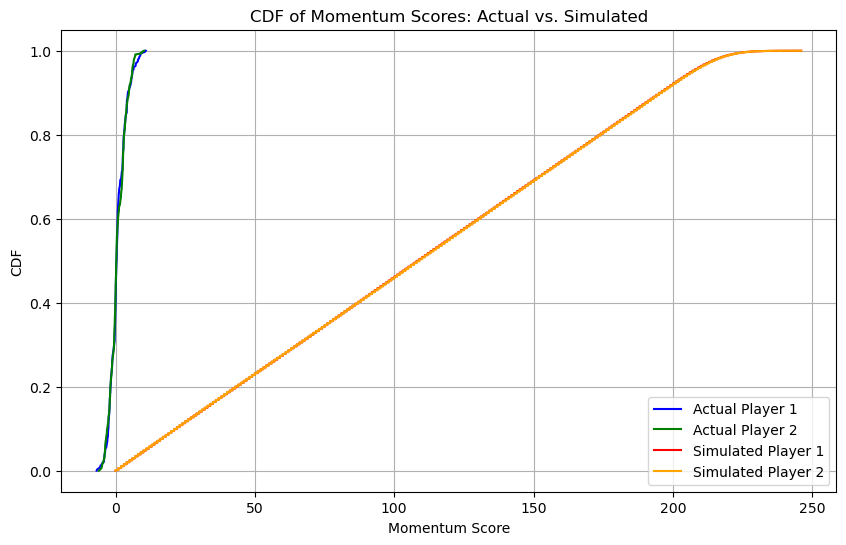

In [7]:
# 对模拟得分进行累积求和和平展处理
simulated_data_1 = np.concatenate(simulated_scores_1).flatten()
simulated_data_2 = np.concatenate(simulated_scores_2).flatten()

# 绘制CDF图
def plot_cdf(data, label, color):
    sorted_data = np.sort(data)
    yvals = np.arange(len(sorted_data)) / float(len(sorted_data) - 1)
    plt.plot(sorted_data, yvals, label=label, color=color)

plt.figure(figsize=(10, 6))
plot_cdf(actual_momentum_scores_1, 'Actual Player 1', 'blue')
plot_cdf(actual_momentum_scores_2, 'Actual Player 2', 'green')
plot_cdf(simulated_data_1, 'Simulated Player 1', 'red')
plot_cdf(simulated_data_2, 'Simulated Player 2', 'orange')

plt.xlabel('Momentum Score')
plt.ylabel('CDF')
plt.title('CDF of Momentum Scores: Actual vs. Simulated')
plt.legend()
plt.grid(True)
plt.show()


从图中可以看出，实际玩家1和2的势头得分（分别用蓝色和绿色线表示）与模拟玩家1和2的势头得分（分别用红色和橙色线表示）之间存在明显的差异。这与我们之前的统计检验结果一致，即实际玩家的势头得分显著不同于随机模拟的结果。